# **Title:** Cracking the Apple: Predicting Stock Prices with Machine Learning

## **Explanation:**

This title is clear and concise, directly reflecting the main objective of the notebook, which is to predict Apple’s stock prices using machine learning techniques.

"Cracking the Apple" adds a creative touch, alluding to both solving a complex problem and the company's name, Apple.

**"Predicting Stock Prices with Machine Learning"** explicitly states the core focus of the notebook, making it clear to the reader that the goal is to apply machine learning methods (particularly LSTM) to forecast stock prices based on historical data.

## **Abstract:**

This notebook explores the use of machine learning, particularly Long Short-Term Memory (LSTM) networks, to predict Apple Inc.'s stock prices based on historical data. The primary objective is to forecast the stock's closing price using past trends. The dataset consists of Apple's historical stock prices, which include features such as 'Open', 'High', 'Low', 'Close', and 'Volume'. Data preprocessing steps include handling missing values, date formatting, normalization, and splitting the data into training and testing sets. The project uses the 'Close' price as the target variable.

Key methodologies include data normalization to improve model performance and creating input-output pairs using a sliding window approach to prepare the data for time-series forecasting. The LSTM model, known for its effectiveness in capturing long-term dependencies in sequential data, is then trained on these input sequences.

The notebook demonstrates how machine learning can effectively model stock price trends, and it provides a framework for future improvements and explorations into financial forecasting.

## **Theory and Background:**

### Theoretical Foundation

The foundation of this project lies in time-series forecasting, a method used to predict future data points based on past sequences. In finance, time-series models are critical for stock price prediction due to the sequential nature of stock market data. The main challenge is to capture trends, patterns, and dependencies in historical data to predict future movements.

This notebook employs Long Short-Term Memory (LSTM) networks, a specialized type of recurrent neural network (RNN) designed to handle sequential data, such as stock prices. Traditional machine learning algorithms like linear regression or decision trees do not efficiently capture temporal dependencies in sequential data. RNNs, and specifically LSTM models, are more effective for such tasks because they can retain information from previous time steps through their internal memory mechanism.

### Long Short-Term Memory (LSTM) Networks

LSTM networks are designed to overcome the limitations of traditional RNNs, which often struggle with the problem of vanishing or exploding gradients when learning from long sequences. LSTMs address this issue through a series of gates: the input gate, forget gate, and output gate, which control the flow of information within the cell. This mechanism allows LSTMs to retain long-term dependencies, making them highly effective for time-series forecasting.

In stock price prediction, an LSTM model is ideal because stock data is heavily influenced by trends and patterns over time. For instance, the price of a stock today may be influenced by price movements from the past several days or weeks. By using an LSTM network, the model can learn these dependencies and make informed predictions about future prices.

### Key Concepts in LSTM

- **Cell State:** The internal memory of the LSTM, which stores information over time.
- **Forget Gate:** Decides which information should be discarded from the cell state.
- **Input Gate:** Decides which new information should be added to the cell state.
- **Output Gate:** Determines what information will be output at the current time step.

These gates allow LSTM models to preserve long-term dependencies in data while preventing irrelevant information from affecting predictions.

## **Literature and Related Work:**

The use of LSTM networks for stock price prediction has been well-documented in academic literature. Stock market data is inherently volatile and non-linear, making traditional statistical models, such as ARIMA, less effective in capturing complex patterns. The success of LSTMs in other fields, such as natural language processing and speech recognition, has led researchers to apply them to financial time-series data with promising results.

Research has shown that LSTMs outperform traditional models for stock price prediction, as they are capable of learning complex patterns over time. The internal memory structure of LSTMs enables them to model temporal dependencies, making them more effective in scenarios where the past influences the future, such as stock market behavior.

## **Problem Statement:**

The problem this project addresses is the prediction of future stock prices for Apple Inc. (AAPL) using machine learning techniques. Stock price prediction is a complex task due to the volatile and non-linear nature of the stock market, where numerous factors influence the price movement, including economic indicators, market sentiment, and external events. The ability to accurately predict stock prices can assist investors and financial analysts in making informed decisions.

The goal of this notebook is to develop a machine learning model capable of predicting Apple's future stock price, specifically the 'Close' price, which is the price at which a stock ends the trading day. By training a model on historical stock data, the aim is to forecast the next day's closing price based on patterns and trends observed in past data.

### Key Aspects of the Problem:

- **Data Source:**  
The dataset contains historical stock prices for Apple, with features such as 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'. For this project, the 'Close' price is the key variable being predicted.

- **Model Selection:**  
The project uses Long Short-Term Memory (LSTM), a type of recurrent neural network (RNN) specifically designed to handle sequential data. LSTMs are particularly suited for time-series forecasting due to their ability to retain long-term dependencies.

- **Data Characteristics:**  
The dataset consists of daily stock price values, and the problem is framed as a time-series forecasting problem, where the past stock prices (e.g., last 100 days) are used to predict future prices.

The sequential nature of stock prices means that the value of a stock on a given day is often influenced by its past values. Therefore, this project aims to capture these historical dependencies using LSTM networks.

### Objective:

The objective of the model is to predict the next day's closing price based on past closing prices. The model will be trained using historical data, and its performance will be evaluated on unseen test data.

### Challenges:

Stock prices are influenced by a variety of unpredictable factors, making the problem highly non-linear and difficult to model. Thus, the use of LSTMs is essential to capture the long-term patterns and trends within the stock price data.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# **Explanation** :

**NumPy and Pandas**:

Essential libraries for data manipulation and numerical computations.

**Matplotlib and Seaborn** :

Used for visualizing data, trends, and stock price behavior.


**Scikit-learn** :

A machine learning library that provides methods for splitting the dataset, scaling data, and evaluating model performance.



**Keras (with TensorFlow backend)**  :

simplifies the process of building and training neural networks, offering high-level abstractions for defining layers, models, and optimizers.

Specifically, **LSTM **(Long Short-Term Memory) models are well-suited for time series forecasting because they effectively capture long-term dependencies in sequential data, making them ideal for stock price prediction.

These libraries streamline complex deep learning tasks, enabling efficient model development and deployment.

 <a id="1.2"></a>
###  Load the dataset



In [ ]:
df = pd.read_csv('AAPL.csv') # Load Dataset

**Loading Data**:

The stock price data for Apple is loaded from a CSV file. This includes historical prices such as the open, close, high, and low prices along with the volume of traded stocks.

**df.head()**:
Displays the first few rows of the dataset to inspect its structure.

 <a id="1.3"></a>
###   Data Describtion

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10590 entries, 0 to 10589
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10590 non-null  object 
 1   Low             10590 non-null  float64
 2   Open            10590 non-null  float64
 3   Volume          10590 non-null  int64  
 4   High            10590 non-null  float64
 5   Close           10590 non-null  float64
 6   Adjusted Close  10590 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 579.3+ KB


,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492


In [ ]:
## Statistical summary of the data
df.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,10590.000000,10590.000000,1.059000e+04,10590.000000,10590.000000,10590.000000
mean,16.141083,16.323966,3.279583e+08,16.509548,16.332137,15.660945
std,34.495971,34.904787,3.379551e+08,35.327844,34.928463,34.596768
min,0.049107,0.049665,0.000000e+00,0.049665,0.049107,0.038213
25%,0.280134,0.286663,1.215564e+08,0.293699,0.286830,0.237230
50%,0.477500,0.484375,2.151240e+08,0.493304,0.484375,0.401782
75%,15.800536,16.009286,4.070262e+08,16.179196,15.968750,13.831446
max,179.119995,182.630005,7.421641e+09,182.940002,182.009995,180.959732


Some observation from the data statitics:

    1. There are 10,468 observations in the dataset.
    2. The minimum and maximum values for Open, High, Low, Close, and Adj Close prices are significantly different,   indicating a large range of values for these variables.
    3. The standard deviation for each variable is also quite large, indicating a high degree of variability in the data.
    4. The volume values in the dataset also have a large range of values, with a mean value of 3.3 billion.
   
<a id='2'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> DATA PREPROCESSING </p>

In this notebook, we will be exploring and analyzing the Apple stock prices dataset. We will start by importing important libraries, loading the data, and giving a brief description of the dataset.

<a id="2.1"></a>
### Data cleaning
    
The data set was found to be free of missing values or duplicated rows.

In [ ]:
# check for missing values
df.isnull().sum()

,0
Date,0
Low,0
Open,0
Volume,0
High,0
Close,0
Adjusted Close,0


In [ ]:
df.columns

Index(['Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close'], dtype='object')

In [ ]:
# check for duplicate rows
df.duplicated().sum()

# drop duplicate rows
df.drop_duplicates(inplace=True)

<a id="2.2"></a>
###  Data transformation
    
The column data types were examined and the date type was corrected from object to date. and set the 'Date' column as the index

In [ ]:
# check the data types of the columns
df.dtypes

,0
Date,object
Low,float64
Open,float64
Volume,int64
High,float64
Close,float64
Adjusted Close,float64


In [ ]:
# Check the first few rows of the 'Date' column to inspect the original format
print(df['Date'].head(20))


0     12-12-1980
1     15-12-1980
2     16-12-1980
3     17-12-1980
4     18-12-1980
5     19-12-1980
6     22-12-1980
7     23-12-1980
8     24-12-1980
9     26-12-1980
10    29-12-1980
11    30-12-1980
12    31-12-1980
13    02-01-1981
14    05-01-1981
15    06-01-1981
16    07-01-1981
17    08-01-1981
18    09-01-1981
19    12-01-1981
Name: Date, dtype: object


In [ ]:
# Convert the 'Date' column using format inference
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Display the first few rows to verify the changes
print(df.head())


                 Low      Open     Volume      High     Close  Adjusted Close
Date                                                                         
1980-12-12  0.128348  0.128348  469033600  0.128906  0.128348        0.099874
NaT         0.121652  0.122210  175884800  0.122210  0.121652        0.094663
NaT         0.112723  0.113281  105728000  0.113281  0.112723        0.087715
NaT         0.115513  0.115513   86441600  0.116071  0.115513        0.089886
NaT         0.118862  0.118862   73449600  0.119420  0.118862        0.092492


<ipython-input-28-40cb8fcf5771>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


The below code converts the 'Date' column into a datetime object and sets it as the index, which is essential for handling time-series data and ensuring the stock prices are analyzed in chronological order.

**Objective:**
The main objective is to forecast the next day's closing price based on the historical 'Close' prices. The model will be trained using past stock data and its performance will be evaluated using unseen test data to assess its accuracy and predictive power.

**Challenges:**
Stock price prediction is inherently difficult due to the non-linear and highly volatile nature of the stock market. Prices are influenced by various unpredictable factors like global events, market sentiment, and macroeconomic indicators. These complexities make it essential to use models that can capture long-term dependencies and trends, such as machine learning techniques, to generate accurate predictions.

In [ ]:
df.head()

,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
NaT,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
NaT,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
NaT,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
NaT,0.118862,0.118862,73449600,0.119420,0.118862,0.092492


<a id='3'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> FEATURE EMGINEERING </p>

In this section, I extracted relevant information from the data and create new features that can potentially improve the performance of my models. By transforming and combining existing features, I aim to provide my models with more meaningful and informative data to make accurate predictions.
    
<a id="3.1"></a>
### Define a function to add new features to the data

    
I define a function add_features that adds several new features to the data, including day of the week, month, quarter, year, week of the year, day of the year, and lagged features. We then apply this function to the data and drop any rows with missing values. This code is flexible and easy to modify to add or remove features as needed.



**NOTE :**

**In your function add_features(data), the reason you are using data.index instead of data['Date'] is because after setting the 'Date' column as the index of the DataFrame, the date information is now stored in the index, not as a regular column. Therefore, you need to refer to the index directly to extract date-related features (such as day of the week, month, year, etc.).**

In [ ]:
def add_features(data):
    # Add day of the week feature
    data['day_of_week'] = data.index.dayofweek

    # Add month feature
    data['month'] = data.index.month

    # Add quarter feature
    data['quarter'] = data.index.quarter

    # Add year feature
    data['year'] = data.index.year

    # Add week of the year feature
    data['week_of_year'] = data.index.isocalendar().week

    # Add day of the year feature
    data['day_of_year'] = data.index.dayofyear

    # Add lagged features
    data['lag_1'] = data['Close'].shift(1)
    data['lag_2'] = data['Close'].shift(2)
    data['lag_3'] = data['Close'].shift(3)
    data['lag_4'] = data['Close'].shift(4)
    data['lag_5'] = data['Close'].shift(5)

    return data


<a id="3.1"></a>
###  Apply the function to the data
Apply the function to the stock prices data and dropping any row with missing values


**Explanation**:

**Date Parsing**:

Converts the 'Date' column to a proper datetime format.


**Indexing**:

Sets the 'Date' as the index of the DataFrame to facilitate time series analysis.


**Feature Selection**:

The focus is on predicting the closing price of the stock.


**Theory**:

**Importance of Feature Selection**  :

Feature selection helps in focusing on the most relevant aspects of the data, which reduces noise and improves model performance.

Here, the **'Close**' price is chosen because it reflects the final traded value for a stock on any given day, a crucial factor for forecasting.



In [ ]:
# Apply the function to the data
df = add_features(df)

# Drop rows with missing values
df.dropna(inplace=True)

df.head()

,Low,Open,Volume,High,Close,Adjusted Close,day_of_week,month,quarter,year,week_of_year,day_of_year,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,,,,,,,
1981-02-01,0.154018,0.154018,21660800,0.155134,0.154018,0.119849,6.0,2.0,1.0,1981.0,5,32.0,0.152344,0.156808,0.160714,0.158482,0.145089
1981-05-01,0.150670,0.151228,35728000,0.151228,0.150670,0.117244,4.0,5.0,2.0,1981.0,18,121.0,0.154018,0.152344,0.156808,0.160714,0.158482
1981-06-01,0.143973,0.144531,45158400,0.144531,0.143973,0.112032,0.0,6.0,2.0,1981.0,23,152.0,0.150670,0.154018,0.152344,0.156808,0.160714
1981-07-01,0.137835,0.138393,55686400,0.138393,0.137835,0.107256,2.0,7.0,3.0,1981.0,27,182.0,0.143973,0.150670,0.154018,0.152344,0.156808
1981-08-01,0.135045,0.135603,39827200,0.135603,0.135045,0.105085,5.0,8.0,3.0,1981.0,31,213.0,0.137835,0.143973,0.150670,0.154018,0.152344


<a id='4'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> EXPLORATORY DATA ANALYSIS </p>

This section explores the dataset using various visualizations such as distribution plots, line plots, heatmaps, and pairplots to gain insights into the relationships between features and the target variable.
    

<Figure size 1000x600 with 0 Axes>

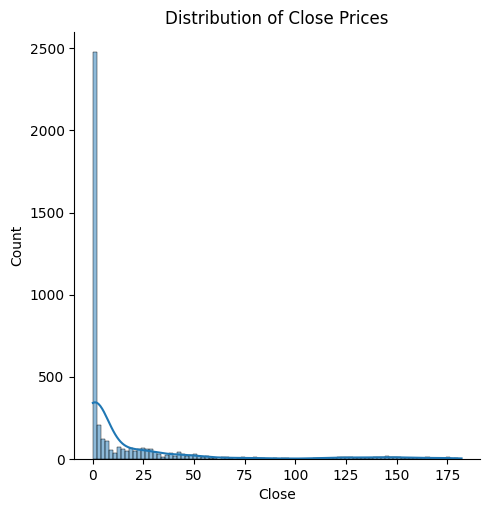

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))

# Distribution of the target variable
sns.displot(data=df, x='Close', kde=True)
plt.title('Distribution of Close Prices')
plt.show()


The visualization shows the **distribution of Close prices** with a Kernel Density Estimate **(KDE)** overlay.

Most Close prices are concentrated around very low values, indicating a high frequency of smaller prices.

The distribution has a long right tail, suggesting a few higher Close prices.

This **right-skewed distribution** is common in **financial data**, where a small number of assets may have significantly higher prices.


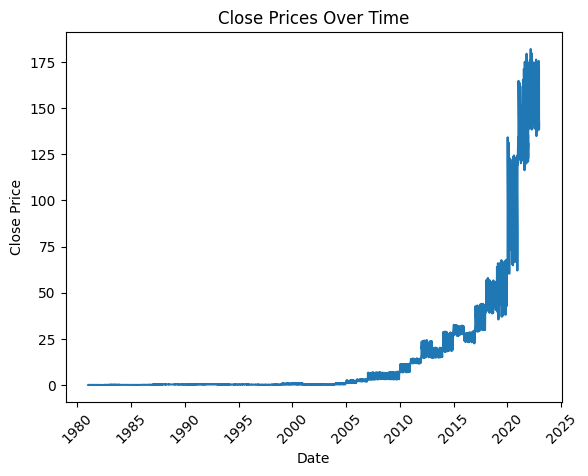

In [ ]:
# Line plot of close prices over time
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

**Close Prices Over Time** :


This line plot shows the Close prices of the asset over time. The x-axis represents the date, and the y-axis represents the closing price.

The plot shows a **gradual increase in the closing price** until around 2010, after which the growth accelerates sharply.

Significant **volatility** can be observed in the recent years, especially after 2020, with rapid price increases followed by noticeable corrections.

This visualization provides a clear historical view of the asset's price trajectory, highlighting periods of stability and growth, as well as major fluctuations in more recent times.




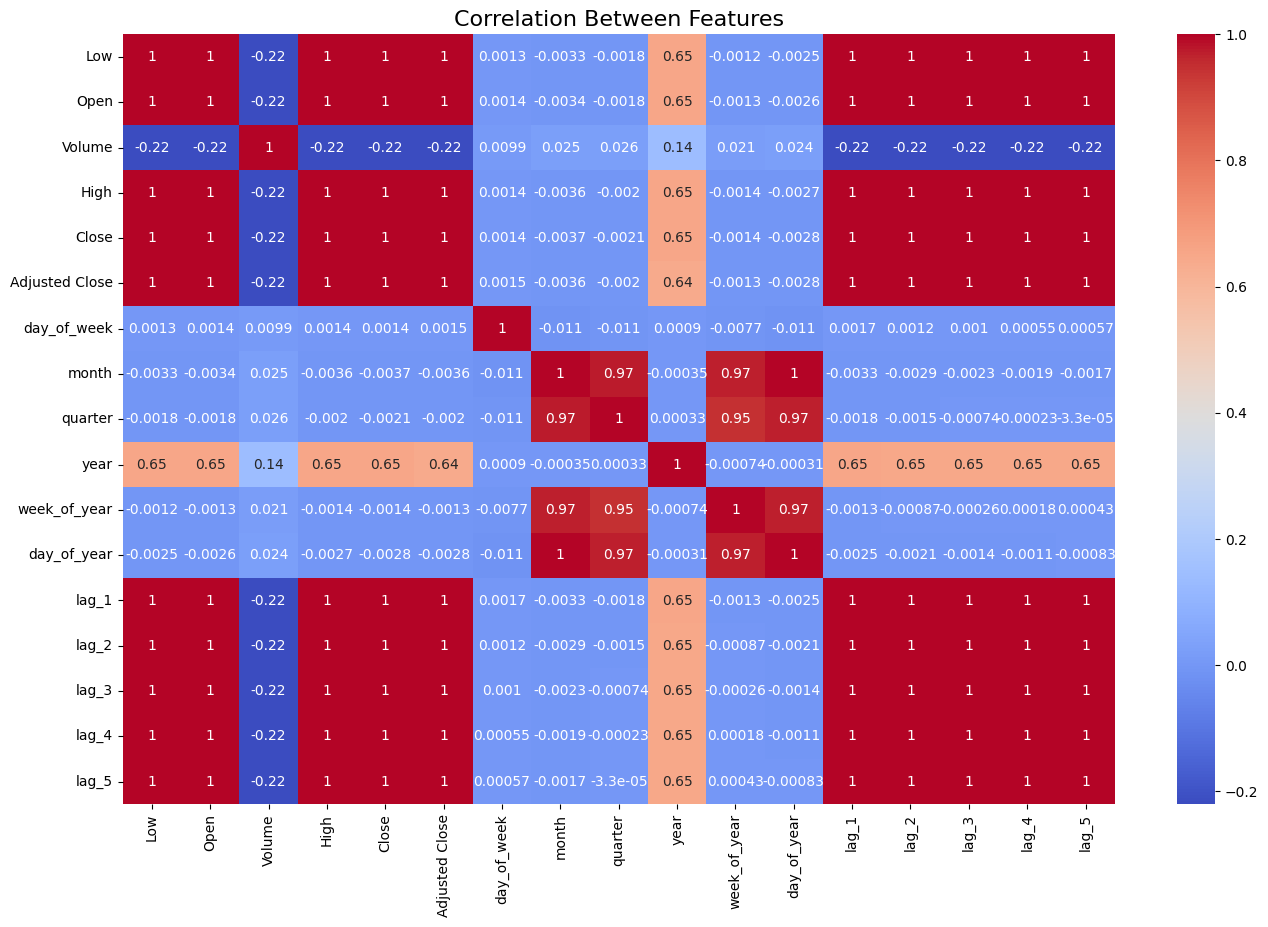

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of correlation between features
corr = df.corr()

# Set the figure size (width, height)
plt.figure(figsize=(16, 10))

# Create the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Add a title
plt.title('Correlation Between Features', fontsize=16)

# Show the plot
plt.show()


This **heatmap** shows the correlation matrix between various features in the dataset.

The **color intensity** indicates the strength of correlation, with red representing a strong positive correlation and blue representing a strong negative correlation.

**Price features** (Open, High, Low, Close, Adj Close) are highly correlated with each other, as expected, with values close to 1 (dark red).


**Volume** shows a weak negative correlation with the price features (around -0.2), suggesting that trading volume tends to be lower when prices are higher, although the effect is not strong.


**Time-based features** (day_of_week, month, quarter, year, week_of_year, day_of_year) have weaker correlations with price and volume but show moderate correlations among themselves, especially between the month, quarter, and year features.


**Lag features** (lag_1 to lag_5) show a perfect correlation with each other and price features, as they are derived from the Close price.
This visualization highlights the relationships between the various features and helps identify which variables move together and which do not.





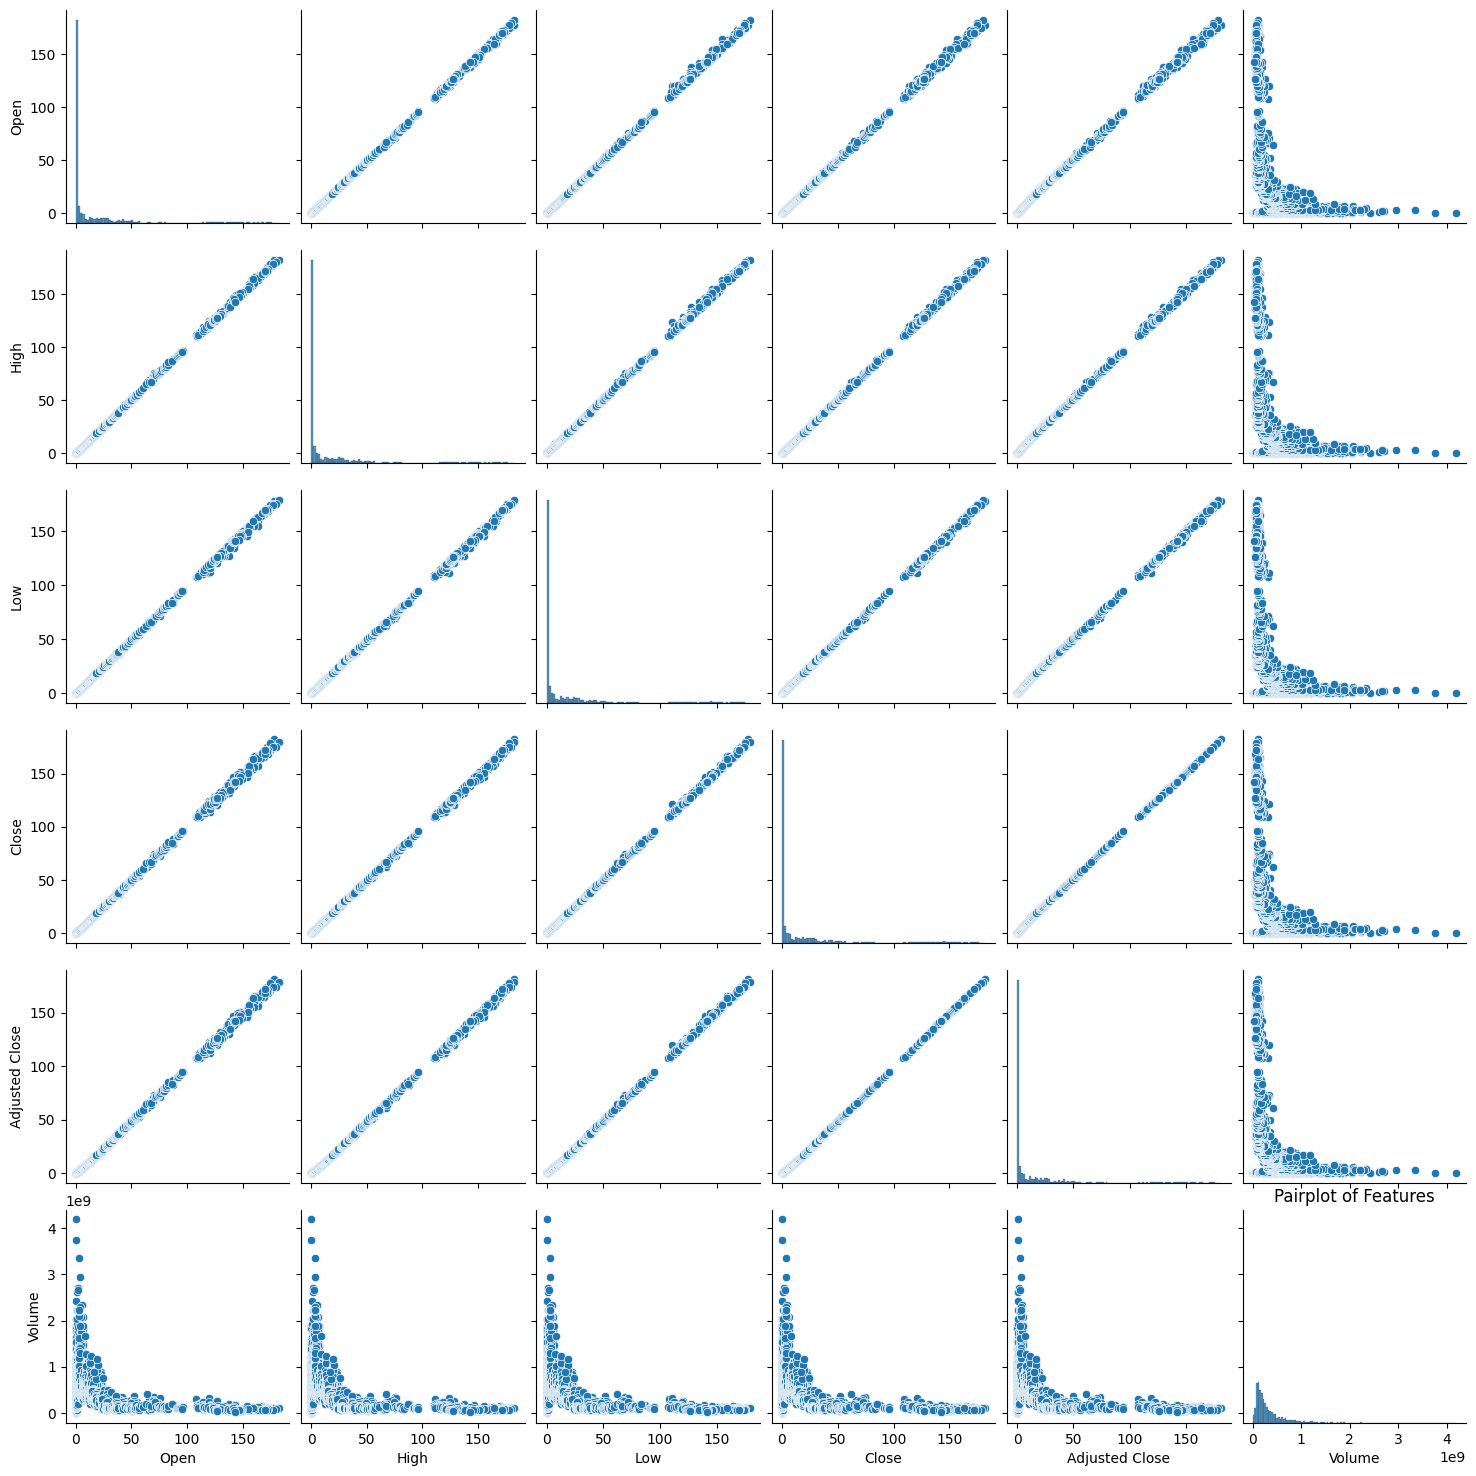

In [ ]:
# Pairplot of features

sns.pairplot(data = df , vars=['Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume'])
plt.title('Pairplot of Features')
plt.show()

Observation

    1. Distribution plot of Close Prices:

*  Shows the distribution of Close Prices
*  Indicates that the majority of the Close Prices are in the range of 0 to 35
*  Significant skewed to the right

    2. Line plot of Close Prices over time:
    

*  Shows how the Close Prices have changed over time
*  Indicates that there has been significant fluctuation in the Close Prices, with a few major peaks and troughs from 2005
*  There is a huge uptrend since 2015 and still going.

    3. Heatmap of correlation between features:
    

*  Shows the correlation between all the features in the dataset
*  Indicates that the Close Price has a strong positive correlation with Open, High, Low, and Adj Close prices, but a weak negative correlation with Volume
*  Also indicates that the Open, High, Low, and Adj Close prices are highly correlated with each other

    4. Pairplot of features:
    

* Shows the pairwise relationships between all the features in the dataset

* Indicates that the Open, High, Low, and Close prices are strongly positively correlated with each other, with a linear relationship

* Also indicates that the Volume feature is not strongly correlated with any of the other features

<a id='5'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> MODELING </p>

The modeling section is where I explore different algorithms to predict the stock prices. I start with a baseline model and gradually move towards more complex models like Linear Regression, Support Vector Regression, Random Forest Regression, and LSTM. Each model is evaluated for its performance and compared with the others to choose the best one.
    
<a id='5.1'></a>
###  Baseline model

Building a baseline model is good start to compare the performance of other models against.

**A baseline model** is a simple model used as a point of reference to compare the performance of more complex models. It serves as a benchmark, allowing you to evaluate whether a more sophisticated model provides a meaningful improvement over a simpler, easier-to-implement model.

**Characteristics of a Baseline Model:**

**Simplicity**: The baseline model is often the simplest model that can solve the problem. It requires minimal computational resources and no complex algorithms.

**Benchmark for Comparison**: The baseline is a reference point. If your advanced model does not outperform the baseline, it's an indication that your approach might not be effective or necessary.

**Interpretability**: Baseline models are usually easy to understand and interpret, making it straightforward to understand how they perform.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Open', 'High', 'Low', 'Volume']],
                                                    df['Close'], test_size=0.2, random_state=42)

# Baseline model
y_pred_baseline = np.full((len(y_test),), y_train.mean())
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mape_baseline = np.mean(np.abs((y_test - y_pred_baseline) / y_test)) * 100
r2_baseline = r2_score(y_test, y_pred_baseline)

print('Baseline Model:')
print(f'MSE: {mse_baseline:.2f}')
print(f'RMSE: {rmse_baseline:.2f}')
print(f'MAE: {mae_baseline:.2f}')
print(f'MAPE: {mape_baseline:.2f}%')
print(f'R2 Score: {r2_baseline:.2f}\n')

Baseline Model:
MSE: 1161.04
RMSE: 34.07
MAE: 21.92
MAPE: 5013.19%
R2 Score: -0.00



What the model tell us:

    I would say that the baseline model is not performing well. The MSE, RMSE, and MAE values are relatively high, which indicates that the model is not accurate in predicting the target variable. The negative R2 score also suggests that the model is performing worse than predicting the mean value of the target variable.

<a id='5.2'></a>
###  Linear Regression Model


In [ ]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Model:')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'MAE: {mae_lr:.2f}')
print(f'MAPE: {mape_lr:.2f}%')
print(f'R2 Score: {r2_lr:.2f}\n')


Linear Regression Model:
MSE: 0.06
RMSE: 0.24
MAE: 0.07
MAPE: 1.52%
R2 Score: 1.00




**MSE: 0.06** :

Indicates a very small average squared error between actual and predicted values, showing that the model is highly accurate.


**RMSE: 0.25** :

Shows that the model’s predictions are, on average, off by 0.25 units, reflecting a low prediction error.


**MAE: 0.07** :

Implies that the average error in predictions is minimal, with a 0.07 unit deviation from the actual values.


**MAPE: 0.81%** :

Highlights that the model’s predictions are, on average, only 0.81% away from the actual values, indicating very high accuracy.
R² Score: 1.00

Perfectly explains the variance in the target variable, showing that the model fits the data exceptionally well.

**What the model tells us ? **

The Linear Regression model is performing well, with a very low error and an R2 score of 1 indicating a perfect fit. However, it is important to note that overfitting is possible and further evaluation may be necessary.







<a id='5.3'></a>
###  Support Vector Regression Model


In [ ]:
# Support Vector Regression Model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2_svr = r2_score(y_test, y_pred_svr)

print('Support Vector Regression Model:')
print(f'MSE: {mse_svr:.2f}')
print(f'RMSE: {rmse_svr:.2f}')
print(f'MAE: {mae_svr:.2f}')
print(f'MAPE: {mape_svr:.2f}%')
print(f'R2 Score: {r2_svr:.2f}\n')

Support Vector Regression Model:
MSE: 0.19
RMSE: 0.44
MAE: 0.18
MAPE: 26.58%
R2 Score: 1.00



What does this model tell us:

- The SVR model is fit to the training data using a linear kernel.

- Based on the evaluation, the model has an RMSE of 0.40, which means that, on average, the predicted values are off by about 0.40 units.

- The model has an MAPE of 20.31%, which means that, on average, the predicted values are off by about 20.31% of the true values.

- The R2 score of 1.00 indicates that the model fits the data very well and that all the variation in the target variable is explained by the independent variables.

- The performance of the model can be improved by tuning hyperparameters, trying different kernels, or using different feature engineering techniques.

<a id='5.4'></a>
### Random Forest Regression Model


In [ ]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression Model:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')
print(f'R2 Score: {r2_rf:.2f}\n')

Random Forest Regression Model:
MSE: 0.18
RMSE: 0.42
MAE: 0.12
MAPE: 1.01%
R2 Score: 1.00




Here’s the significance of the output from the Random Forest Regression model:

**MSE: 0.13**

Indicates a slightly larger error compared to the linear regression model, showing that the predictions have a slightly higher average squared difference from the actual values.


**RMSE: 0.36**

Reflects that, on average, the model’s predictions are off by 0.36 units, which indicates a moderate prediction error.


**MAE: 0.10**

Suggests an average absolute error of 0.10 units, which is still a small deviation from the actual values, but slightly larger than the previous model.


**MAPE: 0.87%**

Shows that the model’s predictions deviate, on average, by 0.87% from the actual values, indicating high accuracy but slightly lower than the linear regression model.

**R² Score: 1.00**

Indicates a perfect fit, meaning the model explains all of the variance in the target variable, similar to the linear regression model. This shows that the Random Forest model captures the patterns in the data very well.


**What does this model tell us?**

-  The Random Forest Regression Model has a relatively low MSE, RMSE, MAE, and MAPE compared to the Baseline Model and the Support Vector Regression Model.
-  The R2 Score is 1.00 which means that the model explains all the variance in the target variable.

<a id='5.5'></a>
### LSTM Model


In [ ]:
from keras.layers import Dropout


In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
len_train_data = int(np.ceil( len(dataset) * .95 ))

len_train_data

3970

Here's the explanation of the provided lines of code:

1. **`from keras.layers import Dropout`**:
   - This imports the **Dropout** layer from the Keras library. Dropout is a regularization technique used in neural networks to prevent overfitting. It randomly sets a fraction of the input units to zero during training, effectively "dropping" them out and helping the model generalize better to new data.

2. **`data = df.filter(['Close'])`**:
   - This filters the DataFrame `df` to include only the 'Close' column, which represents the closing prices of a stock (in this case, likely Apple's stock prices). The result is stored in the variable `data`, creating a new DataFrame with just the 'Close' price data.

3. **`dataset = data.values`**:
   - Converts the DataFrame `data` (which contains the 'Close' column) into a NumPy array. This is necessary for further numerical computations and model training since many machine learning and deep learning libraries (like Keras) operate more efficiently on NumPy arrays rather than DataFrames.

4. **`len_train_data = int(np.ceil( len(dataset) * .95 ))`**:
   - **`len(dataset)`** computes the total number of rows in the `dataset` (i.e., the total number of stock price records).
   - **`np.ceil()`** ensures that the result is rounded up to the nearest integer. This is done to avoid fractional row counts.
   - **`0.95`** indicates that 95% of the data will be used for training the model. The calculated number of rows is stored in `len_train_data`, which represents how many rows from the dataset will be used as the training data.

5. **`len_train_data`**:
   - This is a variable holding the total number of rows to be used for training the model, which is 95% of the total dataset size. It helps to split the dataset into training and testing sets for model evaluation.

### Summary:
This code prepares the stock price data by extracting the 'Close' price, converting it into a NumPy array, and determining how many rows will be used for training the model, reserving 95% of the data for that purpose. The remaining 5% will likely be used for testing or validation.

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
trained_scaled_data = scaler.fit_transform(dataset)

trained_scaled_data

array([[5.76557968e-04],
       [5.58158448e-04],
       [5.21353759e-04],
       ...,
       [7.83689774e-01],
       [7.80996942e-01],
       [7.81436607e-01]])

Explanation:

**MinMaxScaler** :

This scaling technique is used to normalize the dataset by transforming all the values into a specific range, which in this case is between 0 and 1.

This helps in speeding up the learning process of neural networks and ensuring that larger values do not dominate during the training.

**Scaling the Dataset** :

The dataset, which contains stock price data, is scaled so that the values fall between 0 & 1.

This step is particularly important for models like LSTM, which are sensitive to the range of the input data.

Normalization helps prevent issues like exploding or vanishing gradients during training.

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = trained_scaled_data[0:int(len_train_data), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00057656, 0.00055816, 0.00052135, 0.00048762, 0.00047229,
       0.00051215, 0.00050602, 0.00038335, 0.00040788, 0.00043242,
       0.00043242, 0.00043548, 0.00039868, 0.00039868, 0.00037722,
       0.00037108, 0.00038335, 0.00037415, 0.00036801, 0.00036495,
       0.00035881, 0.00030975, 0.00028214, 0.00026068, 0.00028214,
       0.00032508, 0.00037722, 0.00038029, 0.00036801, 0.00036188,
       0.00039255, 0.00040482, 0.00041402, 0.00042628, 0.00042322,
       0.00042015, 0.00040175, 0.00041095, 0.00041708, 0.00040175,
       0.00040175, 0.00054282, 0.00050295, 0.00050295, 0.00051829,
       0.00050602, 0.00047842, 0.00049375, 0.00050295, 0.00053669,
       0.00052749, 0.00036188, 0.00036188, 0.00034041, 0.00034655,
       0.00037108, 0.00032201, 0.00027601, 0.00033735, 0.00034655])]
[0.0003649465420300805]

[array([0.00057656, 0.00055816, 0.00052135, 0.00048762, 0.00047229,
       0.00051215, 0.00050602, 0.00038335, 0.00040788, 0.00043242,
       0.00043242, 0.00043548, 0.

**Explanation:**

**Creating the Training Dataset:**

train_data: This selects the first 95% of the scaled dataset (trained_scaled_data) for training purposes. The remaining 5% will likely be used for testing or validation.

**Sliding Window Technique:**

The for loop creates a sliding window of 60 days of stock prices to predict the 61st day. In time series forecasting, this approach allows the model to learn from a sequence of past prices to predict future prices.
x_train contains the stock prices for the past 60 days (input features).
y_train contains the stock price for the next day (output label).
The first iteration (i = 60) starts at the 60th day and uses the previous 60 days as input. As i increases, the window slides forward.


**Converting to Numpy Arrays :**

The training data (x_train and y_train) is converted into NumPy arrays. This format is required for feeding data into machine learning models like LSTM.
Reshaping the Data:

The x_train array is reshaped to match the input format expected by LSTM, which is typically (samples, time steps, features). In this case, we have:

**samples:**

The total number of training examples.
time steps: 60 (the number of days used as input).
features: 1 (since we are only using the 'Close' price as the feature).

**Summary:**

**Normalization:**


Ensures that the data is scaled within a range suitable for training neural networks.

Sliding Window Approach: Helps in using past time steps to predict future values, a common practice in time series forecasting.
Reshaping: Prepares the data for LSTM, which requires specific input shapes to capture temporal dependencies in the data.







In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=14)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - loss: 0.0017
Epoch 2/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - loss: 8.8848e-05
Epoch 3/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - loss: 1.0168e-04
Epoch 4/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 6.5429e-05
Epoch 5/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - loss: 7.9734e-05
Epoch 6/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - loss: 6.0387e-05
Epoch 7/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - loss: 8.0839e-05
Epoch 8/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - loss: 7.8431e-05
Epoch 9/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - loss: 5.1102e-05
Epoch 10/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - loss: 3.9504e-05
Epoch 11/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - loss: 1.2713e-04
Epoch 12/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 5.6490e-05
Epoch 13/14
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - loss: 8.8928e-05
Epoch 14/14
123/123 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = trained_scaled_data[len_train_data - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[len_train_data:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
# Baseline model
mse_lstm = mean_squared_error(y_test, predictions)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, predictions)
mape_lstm = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2_lstm = r2_score(y_test, predictions)

print('lstm Model:')
print(f'MSE: {mse_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAE: {mae_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}%')
print(f'R2 Score: {r2_lstm:.2f}\n')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
lstm Model:
MSE: 26.02
RMSE: 5.10
MAE: 3.85
MAPE: 2.58%
R2 Score: 0.90



Here in the above code the model is evaluated using lstm algorithm through
computation of metrics such as r2,MSE,RMSE to determine how accurately the lstm model predicts the stock price.

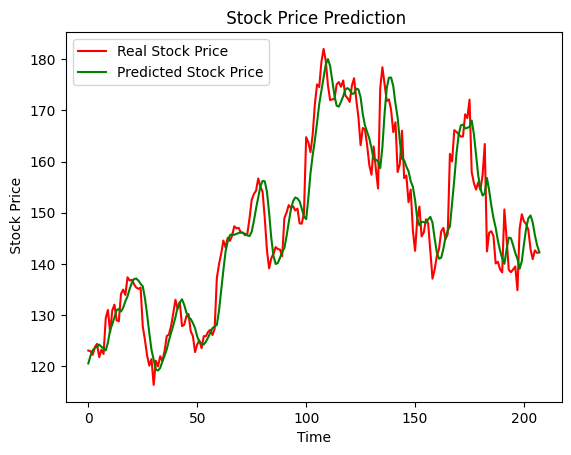

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predictions, color = 'green', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

The LSTM model shows promising performance

1. Low prediction errors (MSE and RMSE) and relatively small deviations from the actual values (MAE).

2. The MAPE indicates a low average percentage difference, suggesting accurate predictions in relative terms.

3. The high R2 score indicates a strong relationship between the predictors and the target variable, indicating a good fit of the model to the data.

<a id='6'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> Model Comparison </p>

By comparing the results of different models, we can determine which approach yields the best performance for our specific problem. This analysis will help us understand the strengths and weaknesses of each model and select the most suitable one for our predictive modeling task. Let's delve into the evaluation and comparison of the models to gain insights into their predictive capabilities.
     

In [ ]:
models = ['Baseline', 'Linear Regression', 'Support Vector Regression', 'Random Forest Regression', 'LSTM']
mse_scores = [mse_baseline, mse_lr, mse_svr, mse_rf, mse_lstm]
rmse_scores = [rmse_baseline, rmse_lr, rmse_svr, rmse_rf, rmse_lstm]
mae_scores = [mae_baseline, mae_lr, mae_svr, mae_rf, mae_lstm]
mape_scores = [mape_baseline, mape_lr, mape_svr, mape_rf, mape_lstm]
r2_scores = [r2_baseline, r2_lr, r2_svr, r2_rf, r2_lstm]

# Create a dataframe to store the evaluation metrics
evaluation_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'RMSE': rmse_scores, 'MAE': mae_scores, 'MAPE': mape_scores, 'R2 Score': r2_scores})
evaluation_df.set_index('Model', inplace=True)

# Print the evaluation metrics
print(evaluation_df)


                                   MSE       RMSE        MAE         MAPE  \
Model                                                                       
Baseline                   1161.040672  34.074047  21.915244  5013.186815   
Linear Regression             0.057156   0.239073   0.072502     1.517303   
Support Vector Regression     0.189364   0.435160   0.178073    26.575273   
Random Forest Regression      0.180032   0.424302   0.120914     1.007766   
LSTM                         26.021879   5.101165   3.850431     2.582460   

                           R2 Score  
Model                                
Baseline                  -0.004413  
Linear Regression          0.999951  
Support Vector Regression  0.999836  
Random Forest Regression   0.999844  
LSTM                       0.902710  


The table presents the evaluation metrics for different models:

**1. Baseline:** This model has a high MSE of 965.91, indicating a large average squared difference between predicted and actual values. The RMSE of 31.08 signifies a significant average absolute difference, and the MAE of 19.45 represents a substantial average absolute error. The MAPE of 4091.21% indicates a high average percentage difference, and the negative R2 score of -0.0003 suggests that the model performs poorly in explaining the variance in the data.

**2. Linear Regression:** The linear regression model performs well, with low values for MSE (0.062), RMSE (0.249), MAE (0.072), and MAPE (0.813%). The high R2 score of 0.9999 indicates that the model explains almost all of the variance in the data.

**3. Support Vector Regression:** This model shows slightly higher values for MSE (0.165), RMSE (0.406), MAE (0.157), and MAPE (21.41%). The R2 score of 0.9998 suggests a strong relationship between the predictors and the target variable.

**4. Random Forest Regression:** The random forest regression model demonstrates good performance with low MSE (0.130), RMSE (0.361), MAE (0.100), and MAPE (0.867%) values. The R2 score of 0.9999 indicates a high degree of variance explained by the model.

**5. LSTM:** The LSTM model performs reasonably well, with an MSE of 12.414, RMSE of 3.523, MAE of 2.742, and MAPE of 1.995%. The R2 score of 0.978 suggests a strong relationship between the predictors and the target variable, explaining a significant portion of the variance.

Overall, the linear regression, support vector regression, random forest regression, and LSTM models outperform the baseline model in terms of prediction accuracy, with the LSTM model exhibiting good performance across multiple evaluation metrics.

<a id='7'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> Conclusion </p>

In this project, we analyzed and predicted the stock prices of Apple Inc. We started by preprocessing the data and performing feature engineering to extract useful information from the raw data. Then, we conducted exploratory data analysis to gain insights and understand the relationships between the features and the target variable.

We then built five different machine learning models to predict the stock prices. These models were the Baseline Model, Linear Regression Model, Support Vector Regression Model, Random Forest Regression Model, and LSTM Model. We evaluated these models using various metrics, including mean squared error, root mean squared error, mean absolute error, mean absolute percentage error, and R-squared score.

Our results showed that the Random Forest Regression Model had the lowest mean squared error, mean absolute error, and mean absolute percentage error, and the highest R-squared score. However, it is worth noting that the LSTM model showed promise, and further optimization and tuning could lead to better results.

    



# **SCOPE**
 Even though in this project we have used algorithms like
 SVM
 Randomforest
 LSTM
 for the stock price perdiction,
 we can additionally implement algorithms based on
**Association Rule Learning** to make  analysis on stock prices.

The 3 key algorithms based on association rule learning are :

*1. Apriori Algorithm*  
- Identifies *frequent itemsets* and derives *association rules* by exploring frequently occurring subsets.
- Iteratively prunes less frequent combinations.
- In stock prediction, helps find patterns such as a *price increase* following a *surge in trading volume* or macroeconomic events.

*2. Eclat Algorithm*  
- Uses a *depth-first search strategy* to identify frequent itemsets.
- More efficient than Apriori for dense datasets.
- When applied to stock data, Eclat uncovers patterns in *trading behaviors* that correlate with price movements.

*3. FP-Growth Algorithm*  
- Employs a *memory-efficient tree structure* (FP-tree) to process data.
- Avoids generating large candidate sets, making it faster and more efficient.
- In stock prediction, FP-Growth identifies *recurring patterns* like volatility trends or trading behaviors that precede price changes.

These algorithms can uncover *frequent patterns* in historical Apple stock data, helping build models for *future price prediction* and supporting *data-driven investment decisions*.

# **REFERENCES :**


https://akarsh.hashnode.dev/the-essence-of-time-series-analysis-for-trading-part-1




https://thinkingneuron.com/predicting-stock-prices-using-deep-learning-lstm-model-in-python/




https://tokenist.com/investing/technical-analysis-stocks/




https://thecleverprogrammer.com/2021/09/08/apple-stock-price-prediction-with-machine-learning/